In [49]:
import pandas as pd

df1 = pd.read_csv('gdp_df.csv')

In [50]:
df1

,country,year,anxiety_rate,depressive_disorder_rate,gdp_per_capita
0,Afghanistan,2009,4.695,4.949,1519.693
1,Afghanistan,2010,4.702,4.947,1710.575
2,Afghanistan,2011,4.716,4.945,1699.488
3,Afghanistan,2012,4.739,4.945,1914.774
4,Afghanistan,2013,4.767,4.944,2015.515
...,...,...,...,...,...
1834,Zimbabwe,2015,3.184,3.408,2679.508
1835,Zimbabwe,2016,3.187,3.411,2806.469
1836,Zimbabwe,2017,3.188,3.412,3795.642
1837,Zimbabwe,2018,3.172,3.407,4017.222


In [51]:
# need to define gdp_per_capita:
gdp_per_capita = df1.pivot(index='country', columns='year', values='gdp_per_capita')

In [53]:
GDP_change = gdp_per_capita[2014] - gdp_per_capita[2009]

In [54]:
GDP_change

country
Afghanistan             549.731
Albania                2446.239
Algeria                 280.888
Angola                 1708.623
Antigua and Barbuda   -3396.389
                         ...   
Vanuatu                 111.306
Vietnam                1792.471
World                  2745.661
Zambia                  606.305
Zimbabwe               1079.634
Length: 169, dtype: float64

In [55]:
anxiety_rate = df1.pivot(index='country', columns='year', values='anxiety_rate')

In [56]:
Anxiety_change = anxiety_rate[2014] - anxiety_rate[2009]

In [57]:
Anxiety_change

country
Afghanistan            0.098
Albania                0.062
Algeria                0.053
Angola                -0.011
Antigua and Barbuda    0.042
                       ...  
Vanuatu                0.048
Vietnam                0.251
World                 -0.067
Zambia                 0.120
Zimbabwe              -0.005
Length: 169, dtype: float64

In [58]:
depressive_disorder_rate = df1.pivot(index='country', columns='year', values='depressive_disorder_rate')

In [59]:
depressive_disorder_change = depressive_disorder_rate[2014] - depressive_disorder_rate[2009]

In [60]:
depressive_disorder_change

country
Afghanistan           -0.004
Albania               -0.005
Algeria                0.019
Angola                -0.016
Antigua and Barbuda    0.045
                       ...  
Vanuatu               -0.019
Vietnam               -0.027
World                 -0.009
Zambia                 0.075
Zimbabwe               0.061
Length: 169, dtype: float64

In [68]:
# Merge into a new dataframe for analysis

gdp_change = gdp_per_capita[2014] - gdp_per_capita[2009]
anxiety_change = anxiety_rate[2014] - anxiety_rate[2009]
depressive_change = depressive_disorder_rate[2014] - depressive_disorder_rate[2009]

# Merge into one DataFrame
change_df = pd.DataFrame({
    'gdp_change': gdp_change,
    'anxiety_change': anxiety_change,
    'depressive_change': depressive_change  
}).dropna()

In [69]:
change_df

,gdp_change,anxiety_change,depressive_change
country,,,
Afghanistan,549.731,0.098,-0.004
Albania,2446.239,0.062,-0.005
Algeria,280.888,0.053,0.019
Angola,1708.623,-0.011,-0.016
Antigua and Barbuda,-3396.389,0.042,0.045
...,...,...,...
Vanuatu,111.306,0.048,-0.019
Vietnam,1792.471,0.251,-0.027
World,2745.661,-0.067,-0.009


In [70]:
import seaborn as sns

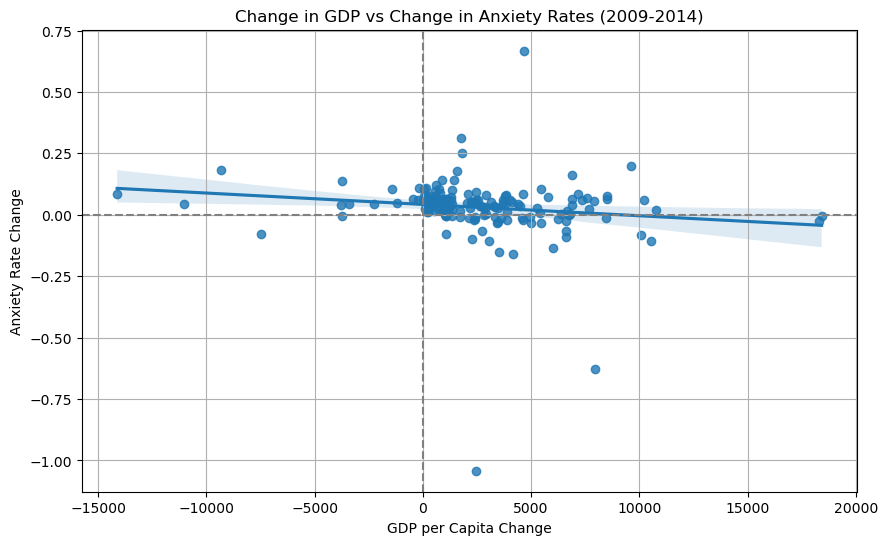

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=change_df, x='gdp_change', y='anxiety_change')
plt.title('Change in GDP vs Change in Anxiety Rates (2009-2014)')
plt.xlabel('GDP per Capita Change')
plt.ylabel('Anxiety Rate Change')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()